<a href="https://colab.research.google.com/github/ddrkaser/540COMP_MTHDS_IND_SYS/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

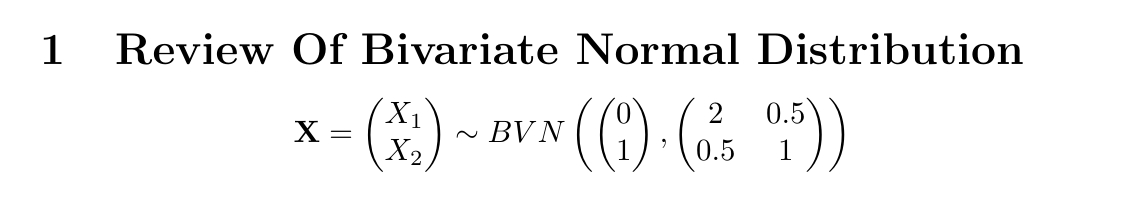

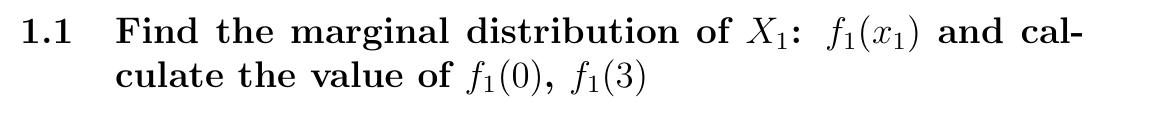

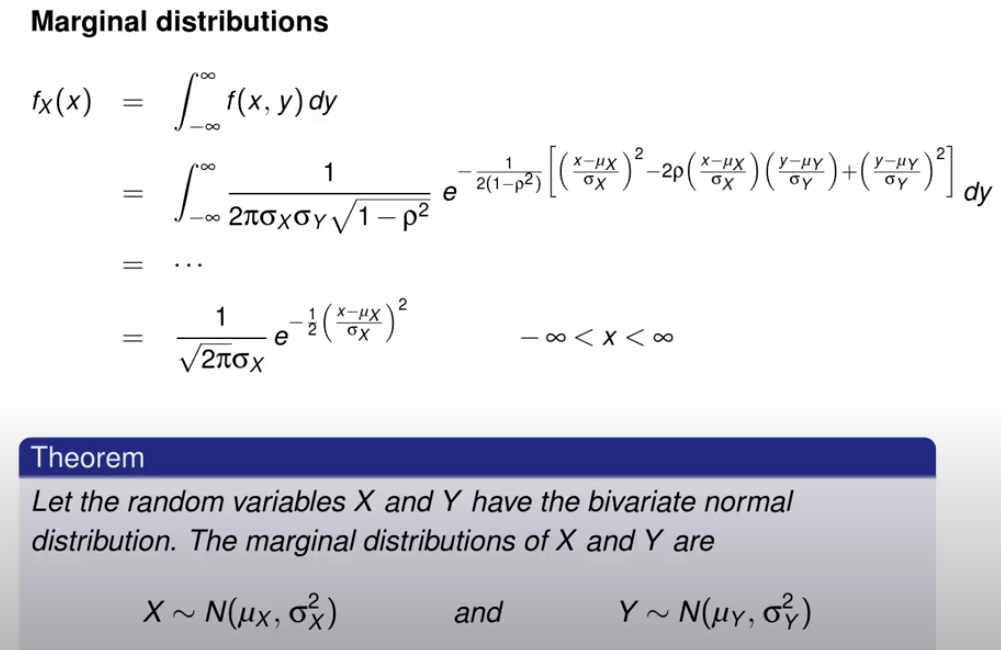

In [ ]:
mean = [0, 1]
cov = [[2, 0.5], [0.5, 1]]
mean_x1 = 0
sd_x1 = np.sqrt(2)

f_1 = scipy.stats.norm(mean_x1, sd_x1)

print('f1(0) is {}'.format(f_1.pdf(0)))
# 0.28209479177387814
print('f1(3) is {}'.format(f_1.pdf(3)))
# 0.02973257230590736

f1(0) is 0.28209479177387814
f1(3) is 0.02973257230590736


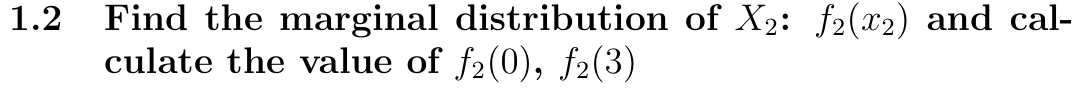

In [ ]:
mean_x2 = 1
sd_x2 = 1

f_2 = scipy.stats.norm(mean_x2, sd_x2)
print('f2(0) is {}'.format(f_2.pdf(0)))
# 0.24197072451914337
print('f2(3) is {}'.format(f_2.pdf(3)))
# 0.05399096651318806

f2(0) is 0.24197072451914337
f2(3) is 0.05399096651318806


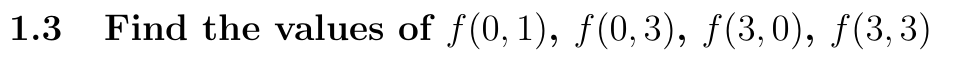

In [ ]:
f_X = scipy.stats.multivariate_normal(mean, cov)
print('f(0,1) is {}'.format(f_X.pdf([0, 1])))
# 0.12030982838508356
print('f(0,3) is {}'.format(f_X.pdf([0, 3])))
# 0.012235677054645589
print('f(3,0) is {}'.format(f_X.pdf([3, 0])))
# 0.0022035513714667716
print('f(3,3) is {}'.format(f_X.pdf([3, 3])))
# 0.0051924890904641125

f(0,1) is 0.12030982838508356
f(0,3) is 0.012235677054645589
f(3,0) is 0.0022035513714667716
f(3,3) is 0.0051924890904641125


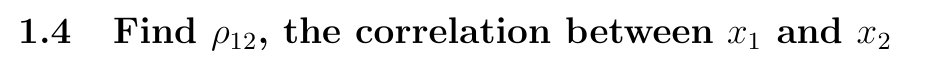

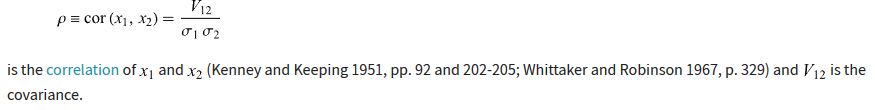

In [ ]:
#according to above Lemma, p12
print(0.5/(sd_x1*sd_x2))

0.35355339059327373


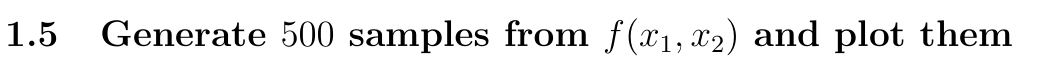

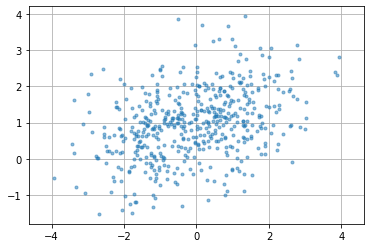

In [ ]:
samples = f_X.rvs(500)
plt.plot(samples[:, 0], samples[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

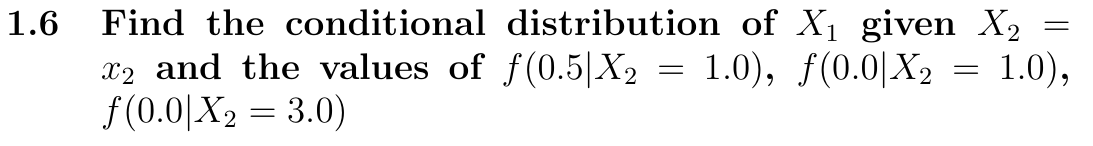

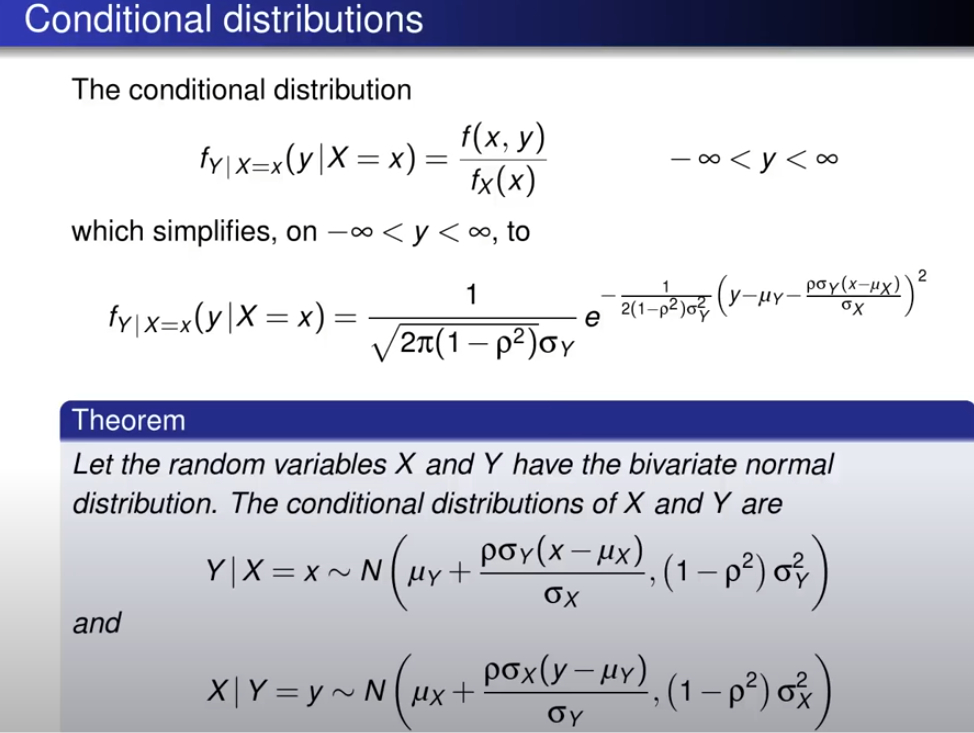

In [ ]:
# f(0.5|x2=1)
print('f(0.5|x2=1) is {}'.format(f_X.pdf([0.5, 1])/f_2.pdf(1)))
# f(0|x2=1)
print('f(0|x2=1) is {}'.format(f_X.pdf([0, 1])/f_2.pdf(1)))
# f(0|x2=3)
print('f(0|x2=3) is {}'.format(f_X.pdf([0, 3])/f_2.pdf(3)))

f(0.5|x2=1) is 0.28078248093737906
f(0|x2=1) is 0.30157201754605373
f(0|x2=3) is 0.2266245234127611


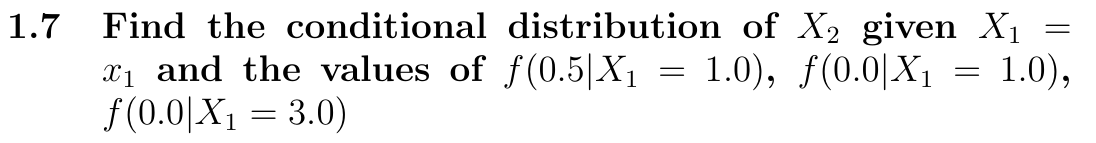

In [ ]:
# f(0.5|x1=1)
print('f(0.5|x1=1) is {}'.format(f_X.pdf([0.5, 1])/f_1.pdf(1)))
# f(0|x1=1)
print('f(0|x1=1) is {}'.format(f_X.pdf([0, 1])/f_1.pdf(1)))
# f(0|x1=3)
print('f(0|x1=3) is {}'.format(f_X.pdf([0, 3])/f_1.pdf(3)))

f(0.5|x1=1) is 0.5098690207428815
f(0|x1=1) is 0.5476204525166013
f(0|x1=3) is 0.41152433528983856


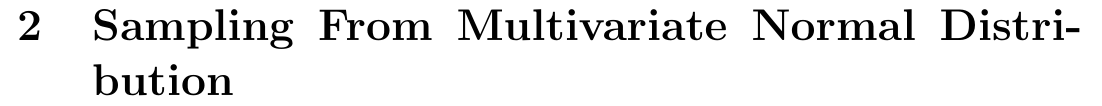

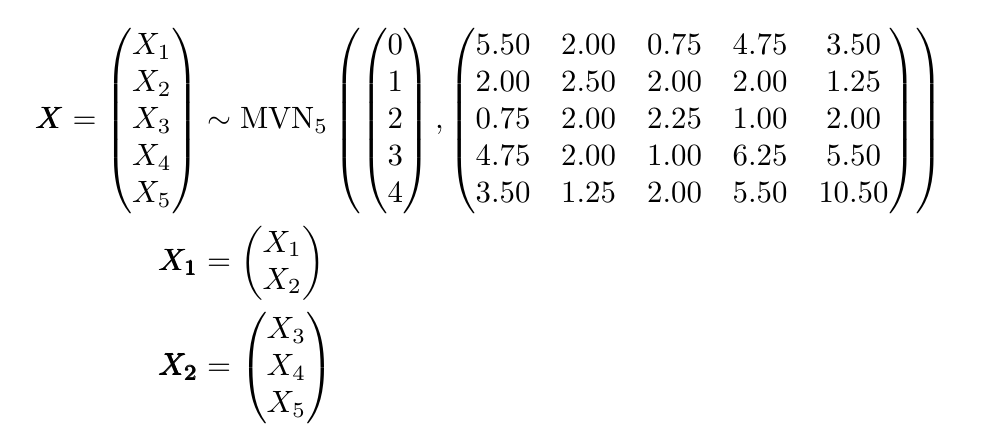

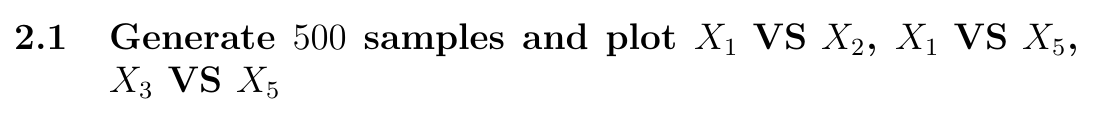

In [ ]:
mean2 = np.arange(5.0)
cov2 = np.array([[5.50, 2.00, 0.75, 4.75, 3.50],
                 [2.00, 2.50, 2.00, 2.00, 1.25],
                 [0.75, 2.00, 2.25, 1.00, 2.00],
                 [4.75, 2.00, 1.00, 6.25, 5.50],
                 [3.50, 1.25, 2.00, 5.50, 10.50]
                 ])

f_X = scipy.stats.multivariate_normal(mean2, cov2)

Text(0.5, 1.0, 'X3 and X5')

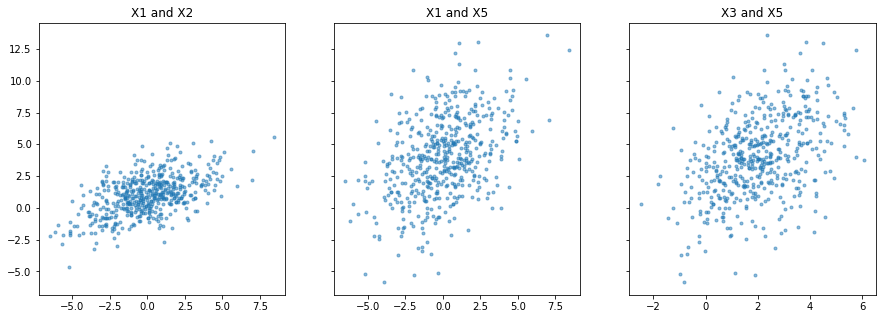

In [ ]:
# 2.1
samples2 = f_X.rvs(500)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].plot(samples2[:, 0], samples2[:, 1], '.', alpha=0.5)
axs[0].set_title('X1 and X2')
axs[1].plot(samples2[:, 0], samples2[:, 4], '.', alpha=0.5)
axs[1].set_title('X1 and X5')
axs[2].plot(samples2[:, 2], samples2[:, 4], '.', alpha=0.5)
axs[2].set_title('X3 and X5')

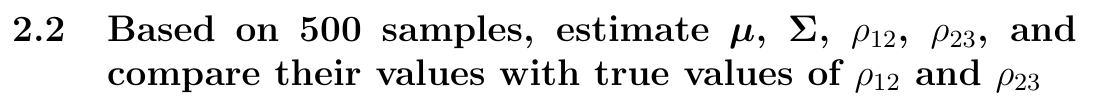

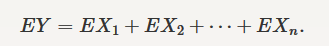

In [ ]:
print('the estimated expectation is')
np.sum(samples2, axis=1).mean()

the estimated expectation is


9.93080102421161

In [ ]:
print('The real expectation is')
mean2.sum()

The real expectation is


10.0

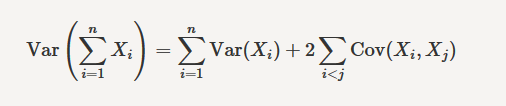

In [ ]:
#according to above Lemma, define function to compute sum_var
def sum_var(m):
    result = 0
    n = len(m)
    for i in range(n-1):
        result += m[i][i]
        for j in range(i+1, n):
            result += 2*m[i][j]
    result += m[-1][-1]
    return result

In [ ]:
m = np.cov(samples2.T)
print('the estimated covariance matrix is')
print(m)
print('the estimated sum_var is')
print(sum_var(m))

the estimated covariance matrix is
[[ 5.48026296  1.94996478  0.62984738  4.70287629  3.18724335]
 [ 1.94996478  2.39017802  1.934239    1.94550236  1.30646011]
 [ 0.62984738  1.934239    2.25344719  0.90040676  2.05337575]
 [ 4.70287629  1.94550236  0.90040676  6.29979316  5.27235992]
 [ 3.18724335  1.30646011  2.05337575  5.27235992 10.00642495]]
the estimated sum_var is
74.19465768094432


In [ ]:
print('the real covariance matrix is')
print(cov2)
print('the real sum_var is')
print(sum_var(cov2))

the real covariance matrix is
[[ 5.5   2.    0.75  4.75  3.5 ]
 [ 2.    2.5   2.    2.    1.25]
 [ 0.75  2.    2.25  1.    2.  ]
 [ 4.75  2.    1.    6.25  5.5 ]
 [ 3.5   1.25  2.    5.5  10.5 ]]
the real sum_var is
76.5


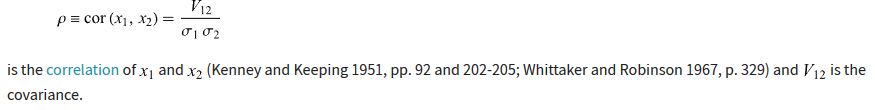

In [ ]:
#we can use above Lemma to define function to compute p_ij given correlation matrix m
def cor_coe(m, i, j):
    return m[i-1, j-1]/np.sqrt(m[i-1][i-1]*m[j-1][j-1])

In [ ]:
print('estimated p12 is {}'.format(cor_coe(m, 1, 2)))
print('real p12 is {}'.format(cor_coe(cov2, 1, 2)))

estimated p12 is 0.5387793543190179
real p12 is 0.5393598899705937


In [ ]:
print('estimated p23 is {}'.format(cor_coe(m, 2, 3)))
print('real p23 is {}'.format(cor_coe(cov2, 2, 3)))

estimated p23 is 0.8334342047115512
real p23 is 0.8432740427115678


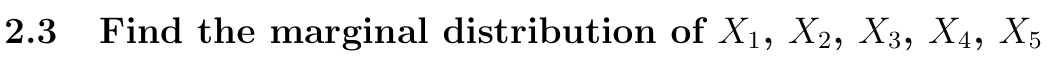

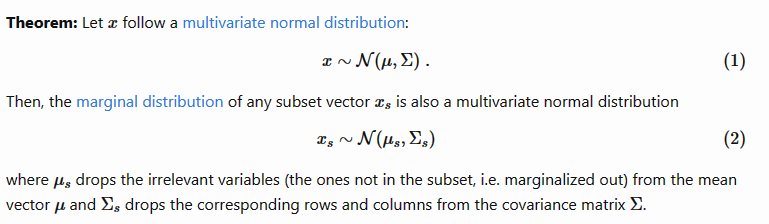

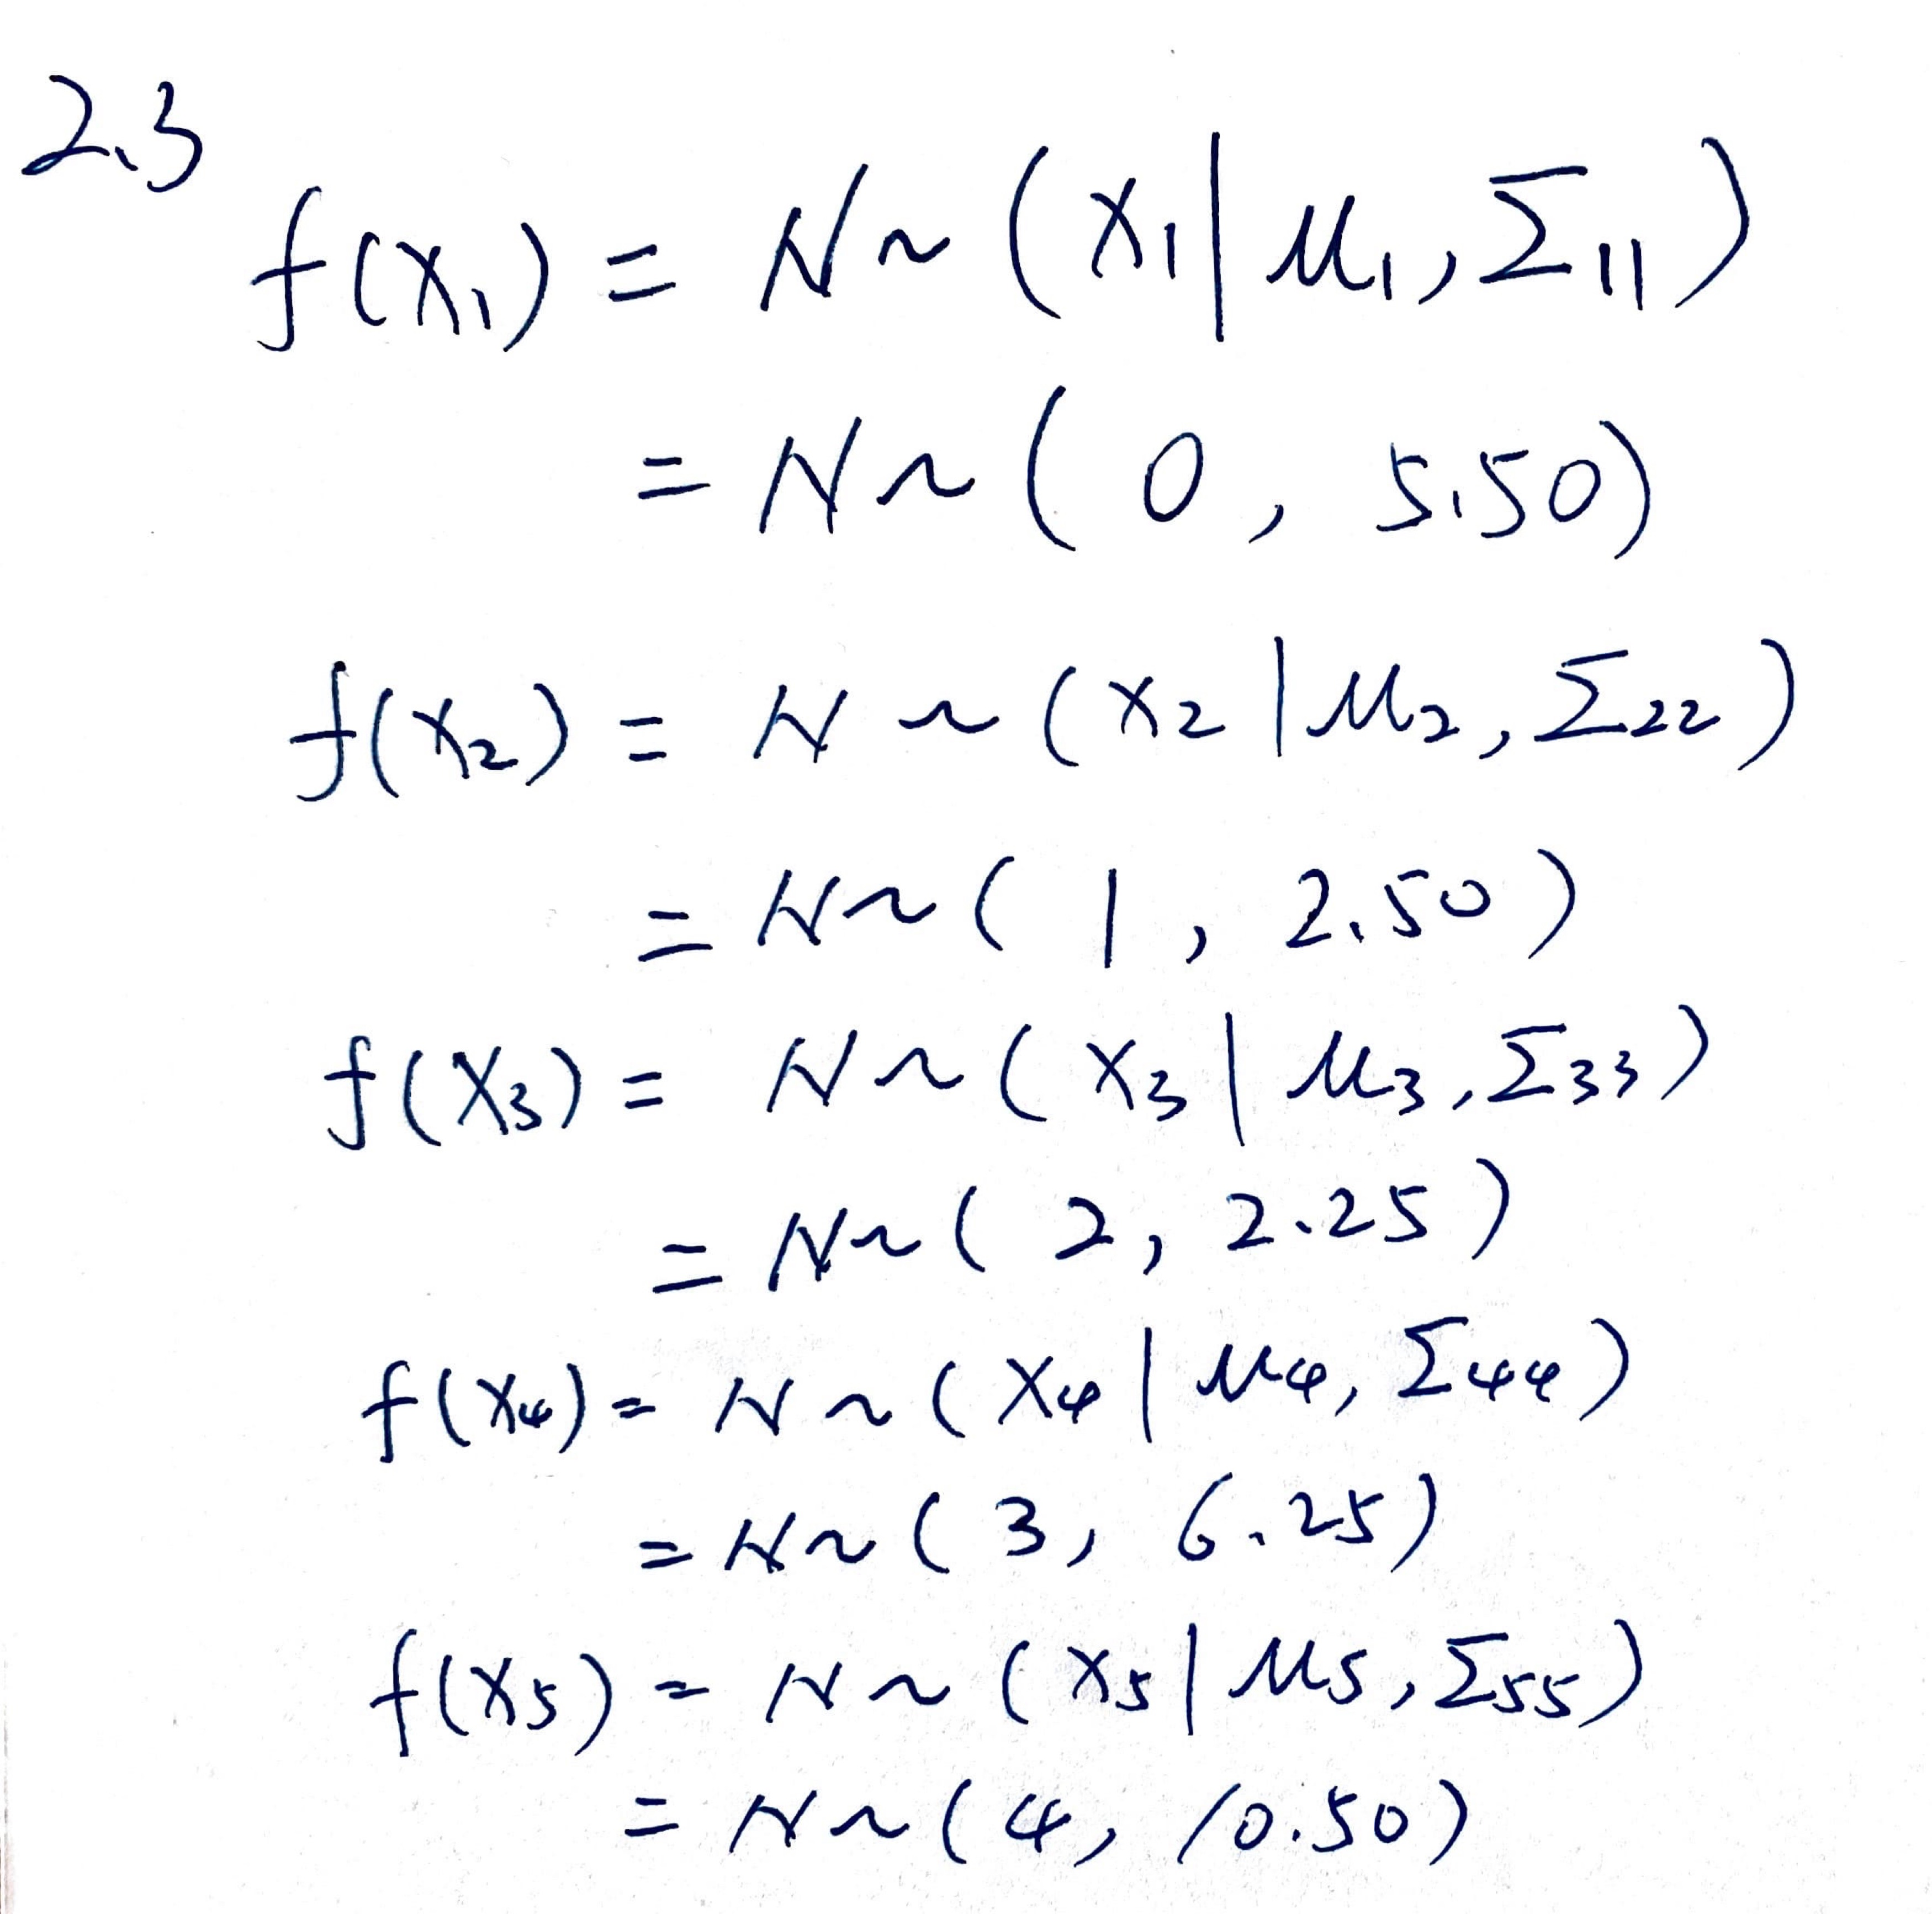

In [ ]:
md = []
for i in range(5):
    md.append(scipy.stats.norm(mean2[i], cov2[i][i]))

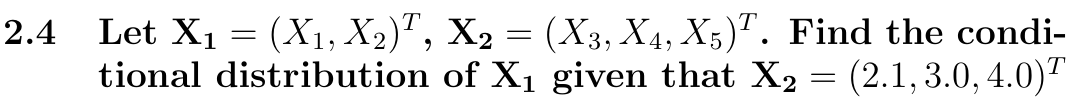

# **Solution#1**

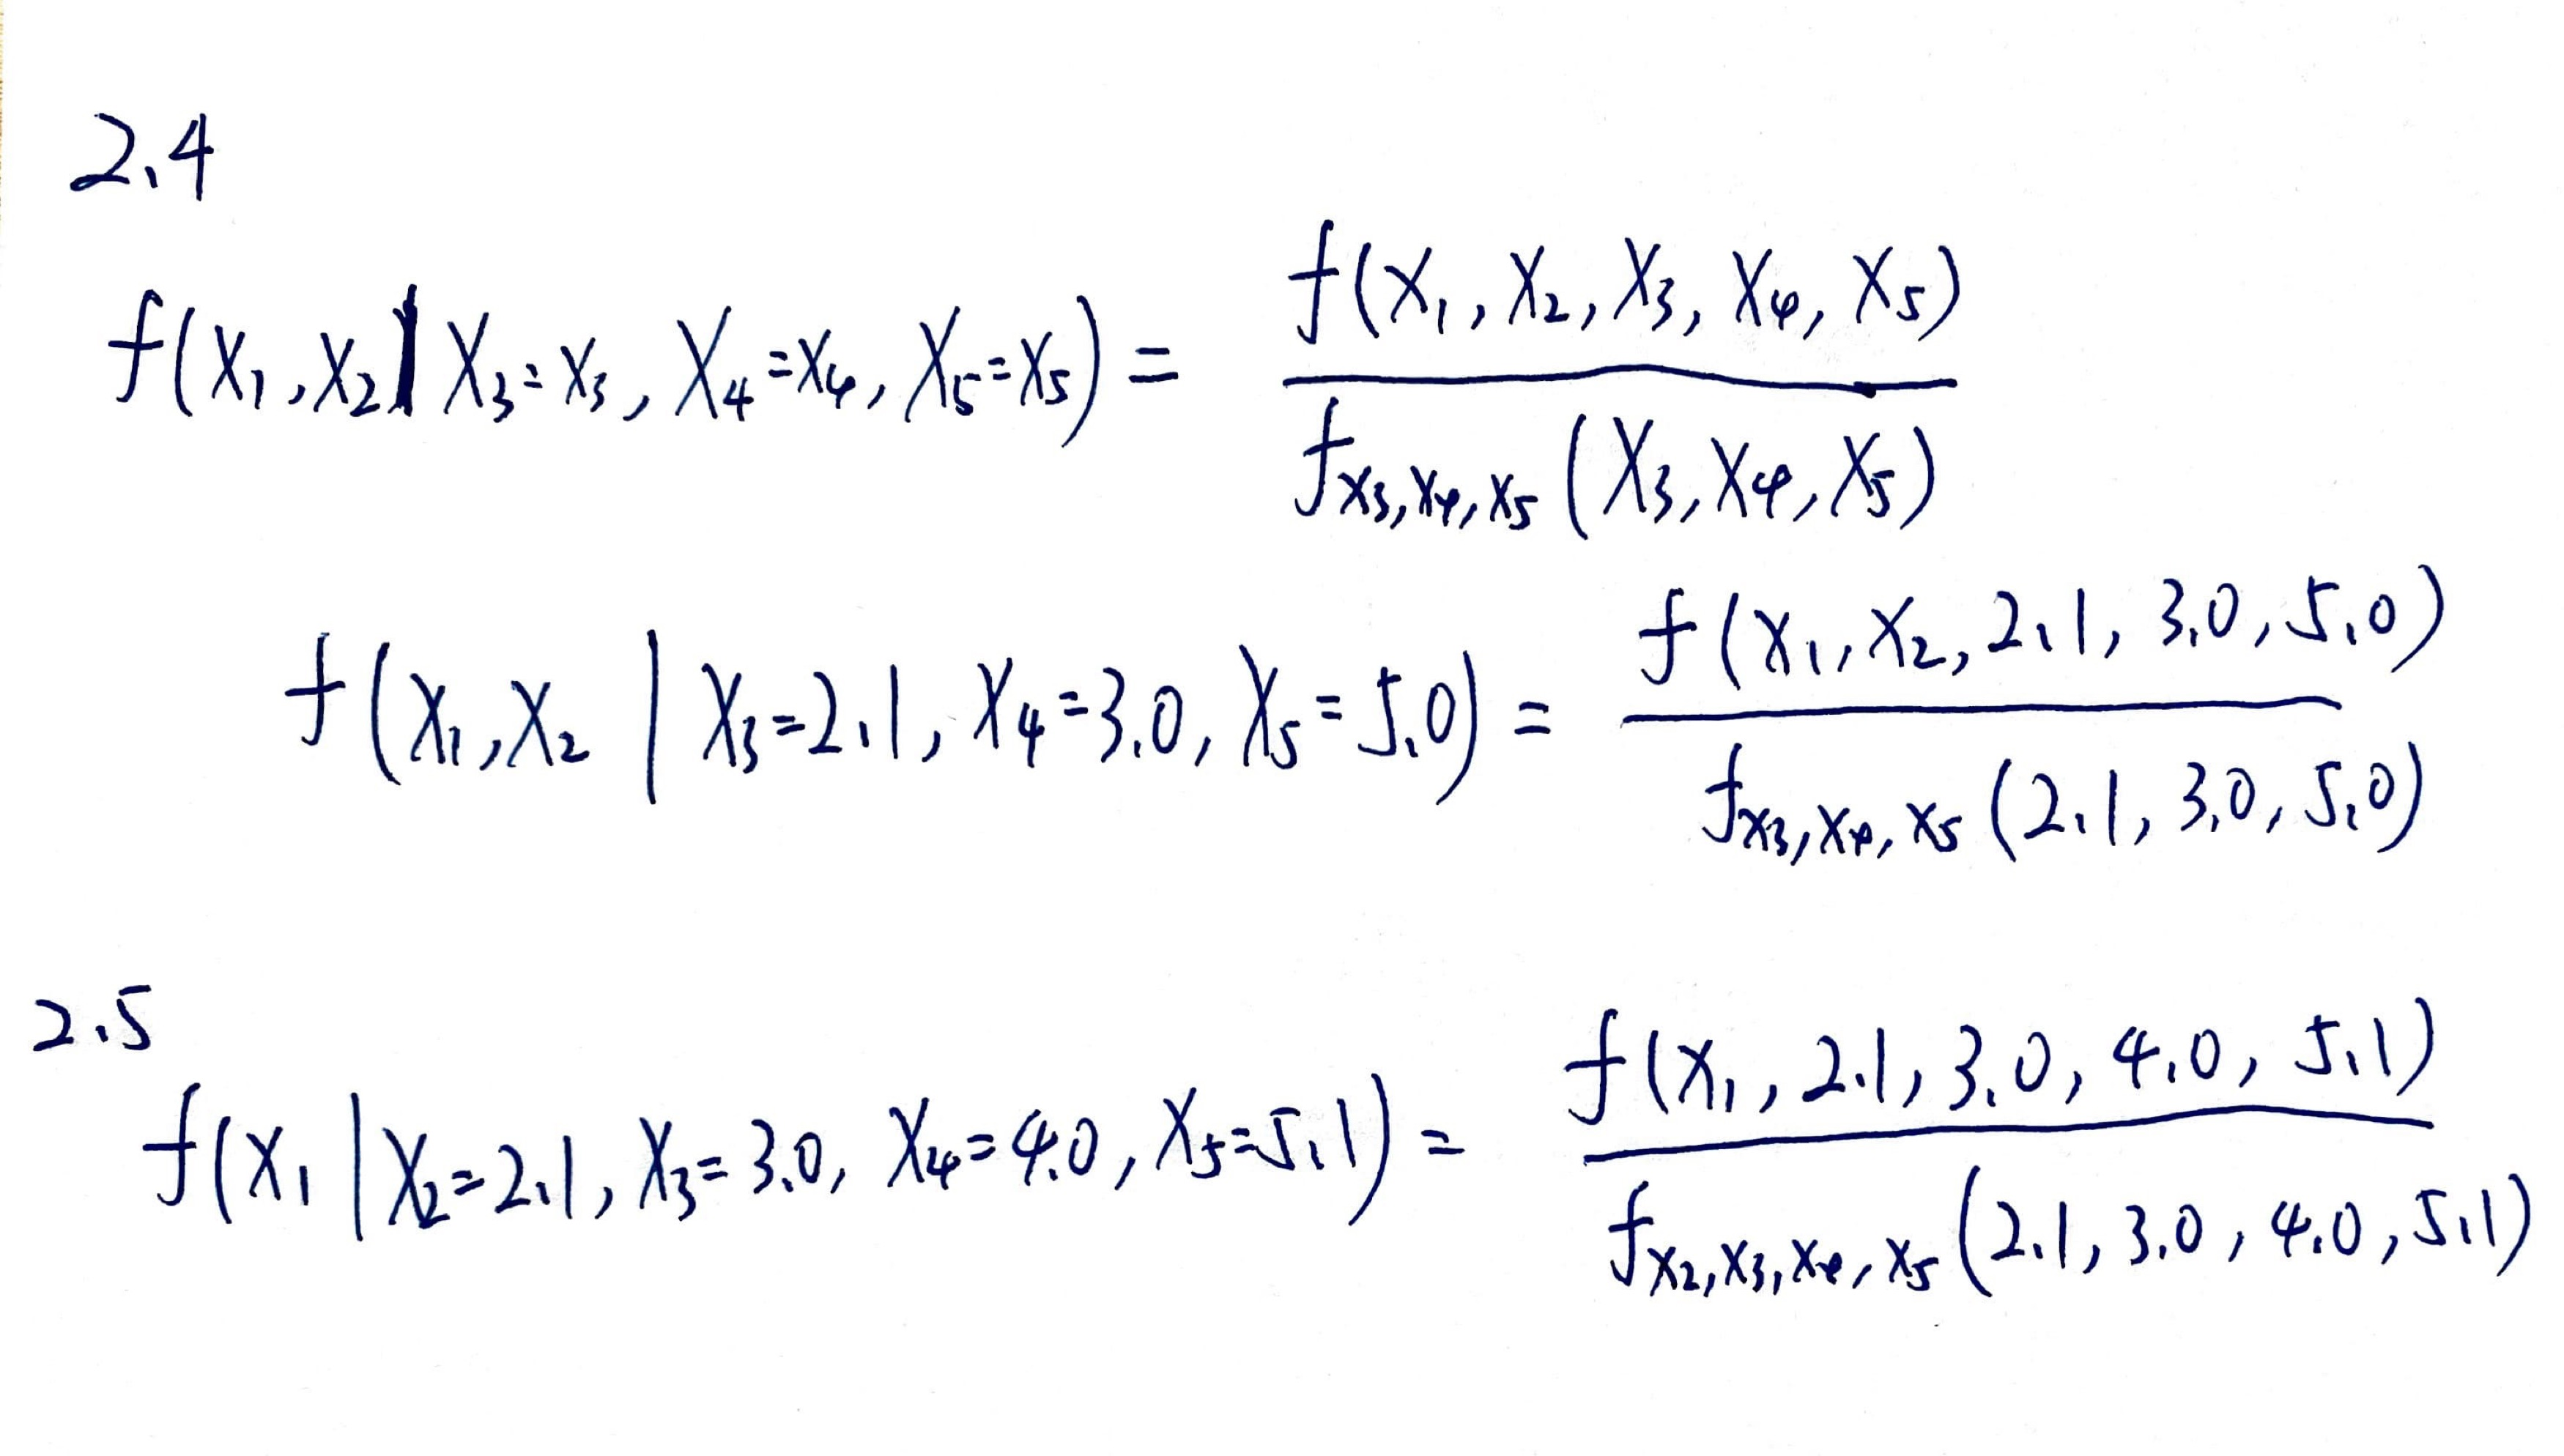

In [ ]:
mean_X2 = np.arange(2.0, 5.0)
cov_X2 = np.array([[2.25, 1.00, 2.00],
                   [1.00, 6.25, 5.50],
                   [2.00, 5.50, 10.50]
                   ])
f_X2 = scipy.stats.multivariate_normal(mean_X2, cov_X2)

f_x12_x345 = f_X.pdf([0.0,1.0,2.1,3.0,4.0])/f_X2.pdf([2.1,3.0,4.0])
print(f_x12_x345)

0.4303453529288689


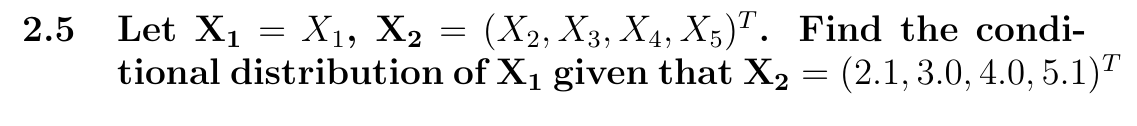

In [ ]:
mean_X2 = np.arange(1.0, 5.0)
cov_X2 = np.array([[2.50, 2.00, 2.00, 1.25],
                   [2.00, 2.25, 1.00, 2.00],
                   [2.00, 1.00, 6.25, 5.50],
                   [1.25, 2.00, 5.50, 10.50]
                   ])
f_X2 = scipy.stats.multivariate_normal(mean_X2, cov_X2)

f_x1_x2345 = f_X.pdf([0.0, 2.1,3.0,4.0,5.1])/f_X2.pdf([2.1,3.0,4.0,5.1])
print(f_x1_x2345)

0.26737863927371486


# **Soulution#2**

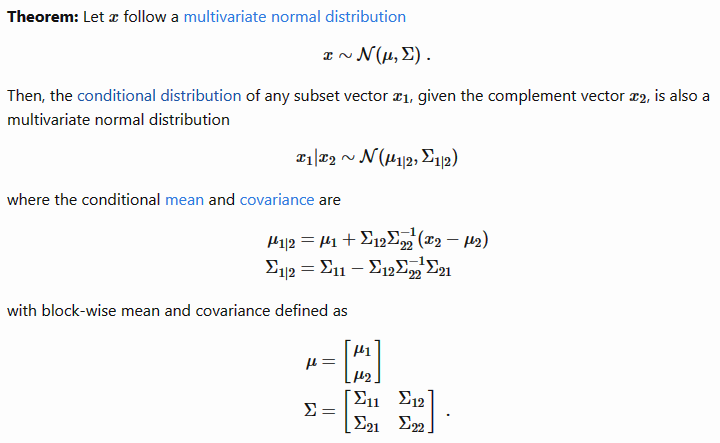

***problem 2.4***

In [ ]:
mean_X2 = np.arange(2.0, 5.0)

cov_X2 = np.array([[2.25, 1.00, 2.00],
                   [1.00, 6.25, 5.50],
                   [2.00, 5.50, 10.50]
                   ])

mean_X1 = np.array([0., 1.])

cov_X1 = np.array([[5.50, 2.00],
                   [2.00, 2.50]
                   ])

cov_12 = np.array([[0.75, 4.75, 3.50],
                   [2.00, 2.00, 1.25]
                   ])

cov_21 = np.array([[0.75, 2.00],
                   [4.75, 2.00],
                   [3.50, 1.25]
                   ])


In [ ]:
mean_X1_X2 = mean_X1 + cov_12 @ np.linalg.inv(cov_X2) @ (np.array([2.1, 3.0, 4.0]) - mean_X2)
cov_X1_X2 = cov_X1 - cov_12 @ np.linalg.inv(cov_X2) @ cov_21
f_X1_X2 = scipy.stats.multivariate_normal(mean_X1_X2, cov_X1_X2)
print('we get the same result as solutin#1')
print(f_X1_X2.pdf([0., 1.]))

we get the same result as solutin#1
0.4303453529288773


***problem 2.5***

In [ ]:
mean_X2 = np.arange(1.0, 5.0)

cov_X2 = np.array([[2.50, 2.00, 2.00, 1.25],
                   [2.00, 2.25, 1.00, 2.00],
                   [2.00, 1.00, 6.25, 5.50],
                   [1.25, 2.00, 5.50, 10.50]
                   ])

mean_X1 = np.array([0.])

cov_X1 = np.array([[5.50]])

cov_12 = np.array([[2.00, 0.75, 4.75, 3.50]
                   ])

cov_21 = np.array([[2.0],
                   [0.75],
                   [4.75],
                   [3.50]
                   ])

In [ ]:
mean_X1_X2 = mean_X1 + cov_12 @ np.linalg.inv(cov_X2) @ (np.array([2.1, 3.0, 4.0, 5.1]) - mean_X2)
cov_X1_X2 = cov_X1 - cov_12 @ np.linalg.inv(cov_X2) @ cov_21
f_X1_X2 = scipy.stats.multivariate_normal(mean_X1_X2, cov_X1_X2)
print('we get the same result as solutin#1')
print(f_X1_X2.pdf([0.0]))

we get the same result as solutin#1
0.26737863927370886
